In [1]:
!pip install librosa
!pip install matplotlib
!pip install tensorflow
!pip install keras

In [2]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
import wave
from scipy.io import wavfile

warnings.filterwarnings("ignore")

In [3]:
train_audio_path = 'POCIETE_NAGRANIA_POPRAWIONE_2'
labels=os.listdir(train_audio_path)

In [4]:
all_wave = []
all_label = []
for label in labels:
    print(label)

    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
   
    for wav in waves:     
         
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr=22050)
        
        #samples = librosa.resample(samples, sample_rate, 22050)
        samples = samples[0:8000]
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

ALARM
BIALY
BRAME
BUDZIK
CIEMNY
CZAJNIK
CZERWONY
CZWARTE
CZY
DOM
DRUGIE
DRZEMKE
DRZWI
DZIALA
EKSPRES
GARAZ
GLOSNOSC
GODZINE
JASNY
KANAL
KAWE
KLIMATYZACJE
KOLOR
KOMPUTER
KORYTARZ
KUCHNI
LATTE
LAZIENCE
LODOWKE
MINUT
MUZYKA
NA
NETFLIX
NIEBIESKI
O
ODKURZACZ
ODTWARZANIE
OPUSC
OTWORZ
PIEKARNIK
PIERWSZE
PIWNICA
POCHLANIACZ
PODLEJ
PODNIES
PRALKE
PROCENT
PRZELACZ
PRZYCIEMNIJ
RADIO
ROLETY
ROZJASNIJ
ROZOWY
SALONIE
STOPNI
STRYCH
SWIATLO
SYPIALNI
TARAS
TELEWIZOR
TEMPERATURE
TERMOOBIEG
TRZECIE
UCHYL
USTAW
W
WILGOTNOSC
WLACZ
WODE
WSZYSTKIE
WYLACZ
WZNOW
YOUTUBE
ZABLOKUJ
ZADZWON
ZAGOTUJ
ZAMKNIJ
ZATRZYMAJ
ZIELONY
ZMIEN
ZMNIEJSZ
ZMYWARKE
ZOLTY
ZWIEKSZ


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [6]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [7]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [8]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.1,random_state=27,shuffle=True)

In [9]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
81/81 [==============================] - 65s 300ms/step - loss: 4.4354 - accuracy: 0.0058 - val_loss: 4.4125 - val_accuracy: 0.0175

Epoch 00001: val_accuracy improved from -inf to 0.01754, saving model to best_model.hdf5
Epoch 2/100
81/81 [==============================] - 25s 309ms/step - loss: 4.3641 - accuracy: 0.0278 - val_loss: 4.2321 - val_accuracy: 0.0491

Epoch 00002: val_accuracy improved from 0.01754 to 0.04912, saving model to best_model.hdf5
Epoch 3/100
81/81 [==============================] - 26s 324ms/step - loss: 4.0421 - accuracy: 0.0586 - val_loss: 3.8747 - val_accuracy: 0.0947

Epoch 00003: val_accuracy improved from 0.04912 to 0.09474, saving model to best_model.hdf5
Epoch 4/100
81/81 [==============================] - 22s 273ms/step - loss: 3.8021 - accuracy: 0.0815 - val_loss: 3.7330 - val_accuracy: 0.0947

Epoch 00004: val_accuracy did not improve from 0.09474
Epoch 5/100
81/81 [==============================] - 22s 275ms/step - loss: 3.5673 - accurac

81/81 [==============================] - 25s 312ms/step - loss: 0.4780 - accuracy: 0.8647 - val_loss: 1.8271 - val_accuracy: 0.6421

Epoch 00078: val_accuracy did not improve from 0.64561
Epoch 79/100
81/81 [==============================] - 28s 346ms/step - loss: 0.4326 - accuracy: 0.8815 - val_loss: 1.9540 - val_accuracy: 0.6211

Epoch 00079: val_accuracy did not improve from 0.64561
Epoch 80/100
81/81 [==============================] - 25s 311ms/step - loss: 0.4184 - accuracy: 0.8744 - val_loss: 2.0605 - val_accuracy: 0.6035

Epoch 00080: val_accuracy did not improve from 0.64561
Epoch 81/100
81/81 [==============================] - 26s 316ms/step - loss: 0.4511 - accuracy: 0.8691 - val_loss: 2.0331 - val_accuracy: 0.6140

Epoch 00081: val_accuracy did not improve from 0.64561
Epoch 82/100
81/81 [==============================] - 25s 308ms/step - loss: 0.4096 - accuracy: 0.8715 - val_loss: 1.9503 - val_accuracy: 0.6281

Epoch 00082: val_accuracy did not improve from 0.64561
Epoch 83

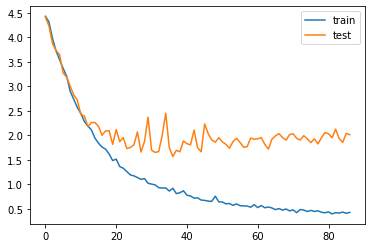

In [11]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [12]:
from keras.models import load_model
model=load_model('best_model.hdf5')

In [13]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [14]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: RADIO


In [15]:
print("Text:",predict(samples))

Text: RADIO


__MODEL 2 - RNN__

In [15]:
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import LSTM, BatchNormalization, TimeDistributed

In [37]:
inputs2 = Input(shape=(8000,1))

model2 = Sequential()
rnn = LSTM(8, activation = 'relu', return_sequences=True, implementation=3)(inputs2)
bn_rnn = BatchNormalization(name='bn_rnn_1d')(rnn)
td_rnn = TimeDistributed(Dense(10))(bn_rnn)
fl_rnn = Flatten()(td_rnn)
fl_rnn = Dense(128, activation='relu')(fl_rnn)
fl_rnn = Dropout(0.3)(fl_rnn)


outputs2 = Dense(len(labels), activation='softmax')(fl_rnn)

model2 = Model(inputs2, outputs2)

In [38]:
model2.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 8000, 1)]         0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 8000, 8)           320       
_________________________________________________________________
bn_rnn_1d (BatchNormalizatio (None, 8000, 8)           32        
_________________________________________________________________
time_distributed_8 (TimeDist (None, 8000, 10)          90        
_________________________________________________________________
flatten_5 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               10240128  
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0   

In [40]:
model2.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

es2 = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto') 
mc2 = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history2 = model2.fit(x_tr, y_tr, batch_size=256, epochs=100, callbacks=[es2, mc2], validation_data=(x_val,y_val))

Epoch 1/100
11/11 [==============================] - 93s 8s/step - loss: 0.0116 - accuracy: 0.0859 - val_loss: 0.0118 - val_accuracy: 0.0140

Epoch 00001: val_accuracy improved from -inf to 0.01404, saving model to best_model.hdf5
Epoch 2/100
11/11 [==============================] - 88s 8s/step - loss: 0.0112 - accuracy: 0.1409 - val_loss: 0.0118 - val_accuracy: 0.0035

Epoch 00002: val_accuracy did not improve from 0.01404
Epoch 3/100
11/11 [==============================] - 89s 8s/step - loss: 0.0113 - accuracy: 0.1549 - val_loss: 0.0118 - val_accuracy: 0.0105

Epoch 00003: val_accuracy did not improve from 0.01404
Epoch 4/100
11/11 [==============================] - 87s 8s/step - loss: 0.0114 - accuracy: 0.1752 - val_loss: 0.0118 - val_accuracy: 0.0070

Epoch 00004: val_accuracy did not improve from 0.01404
Epoch 5/100
11/11 [==============================] - 88s 8s/step - loss: 0.0111 - accuracy: 0.1930 - val_loss: 0.0118 - val_accuracy: 0.0070

Epoch 00005: val_accuracy did not im

11/11 [==============================] - 88s 8s/step - loss: 0.0030 - accuracy: 0.8094 - val_loss: 0.0139 - val_accuracy: 0.0667

Epoch 00082: val_accuracy did not improve from 0.07719
Epoch 83/100
11/11 [==============================] - 87s 8s/step - loss: 0.0030 - accuracy: 0.8067 - val_loss: 0.0141 - val_accuracy: 0.0702

Epoch 00083: val_accuracy did not improve from 0.07719
Epoch 84/100
11/11 [==============================] - 87s 8s/step - loss: 0.0031 - accuracy: 0.8086 - val_loss: 0.0141 - val_accuracy: 0.0667

Epoch 00084: val_accuracy did not improve from 0.07719
Epoch 85/100
11/11 [==============================] - 89s 8s/step - loss: 0.0034 - accuracy: 0.7875 - val_loss: 0.0175 - val_accuracy: 0.0246

Epoch 00085: val_accuracy did not improve from 0.07719
Epoch 86/100
11/11 [==============================] - 87s 8s/step - loss: 0.0049 - accuracy: 0.7089 - val_loss: 0.0182 - val_accuracy: 0.0281

Epoch 00086: val_accuracy did not improve from 0.07719
Epoch 87/100
11/11 [===

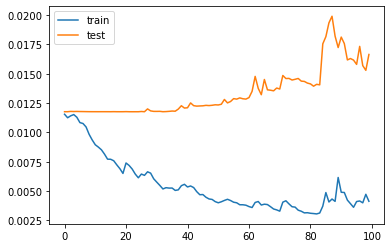

In [44]:
from matplotlib import pyplot
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()